For today remedial test, We would use the 1985 automotive import data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

Like usual, just read the data first

In [2]:
auto = pd.read_csv('auto_imports.csv')

In [3]:
auto.head()

,Symboling,Normalized-Loss,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [55]:
auto['Fuel-Type'].value_counts()

gas       179
diesel     20
Name: Fuel-Type, dtype: int64

In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
Symboling            201 non-null int64
Normalized-Loss      201 non-null object
Make                 201 non-null object
Fuel-Type            201 non-null object
Aspiration           201 non-null object
Num-of-Doors         201 non-null object
Body-Style           201 non-null object
Drive-Wheels         201 non-null object
Engine-Location      201 non-null object
Wheel-Base           201 non-null float64
Length               201 non-null float64
Width                201 non-null float64
Height               201 non-null float64
Curb-Weight          201 non-null int64
Engine-Type          201 non-null object
Cylinders            201 non-null object
Engine-Size          201 non-null int64
Fuel-System          201 non-null object
Bore                 201 non-null object
Stroke               201 non-null object
Compression-ratio    201 non-null float64
Horsepower           201 non-nul

In [5]:
auto.describe()

,Symboling,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Size,Compression-ratio,City-MPG,Highway-MPG,Price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [6]:
auto['Make'].dtypes

dtype('O')

In [7]:
mesin = auto.copy()
mesin = mesin.select_dtypes(include=['object'])
pd.DataFrame(mesin.describe())

,Normalized-Loss,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Engine-Type,Cylinders,Fuel-System,Bore,Stroke,Horsepower,Peak-rpm
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500
freq,37,32,181,165,113,94,118,198,145,157,92,23,19,19,36


In [8]:
autodesc = []
for i in auto.columns:
    autodesc.append([i, auto[i].dtypes, auto[i].isna().sum(), round((((auto[i].isna().sum())/(len(auto)))*100),2), 
                    auto[i].nunique(), auto[i].drop_duplicates().sample(2).values])
pd.DataFrame(autodesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Symboling,int64,0,0.0,6,"[-2, 2]"
1,Normalized-Loss,object,0,0.0,52,"[83, 91]"
2,Make,object,0,0.0,22,"[plymouth, volkswagen]"
3,Fuel-Type,object,0,0.0,2,"[diesel, gas]"
4,Aspiration,object,0,0.0,2,"[std, turbo]"
5,Num-of-Doors,object,0,0.0,3,"[?, two]"
6,Body-Style,object,0,0.0,5,"[hardtop, sedan]"
7,Drive-Wheels,object,0,0.0,3,"[4wd, fwd]"
8,Engine-Location,object,0,0.0,2,"[rear, front]"
9,Wheel-Base,float64,0,0.0,52,"[97.3, 88.6]"


If you realize, some columns that are numerical is listed as object data type. This is because in the data there is '?' value that become the placeholder of Null value. Now, replace all the '?' in every columns as NaN value (np.nan).

In [9]:
auto = auto.replace(to_replace="?", value=np.nan)

In [10]:
(auto=="?").sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Symboling            0
Normalized-Loss      0
Make                 0
Fuel-Type            0
Aspiration           0
Num-of-Doors         0
Body-Style           0
Drive-Wheels         0
Engine-Location      0
Wheel-Base           0
Length               0
Width                0
Height               0
Curb-Weight          0
Engine-Type          0
Cylinders            0
Engine-Size          0
Fuel-System          0
Bore                 0
Stroke               0
Compression-ratio    0
Horsepower           0
Peak-rpm             0
City-MPG             0
Highway-MPG          0
Price                0
dtype: int64

In [11]:
auto[auto['Normalized-Loss']=="?"]

,Symboling,Normalized-Loss,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price


In [12]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
Symboling            201 non-null int64
Normalized-Loss      164 non-null object
Make                 201 non-null object
Fuel-Type            201 non-null object
Aspiration           201 non-null object
Num-of-Doors         199 non-null object
Body-Style           201 non-null object
Drive-Wheels         201 non-null object
Engine-Location      201 non-null object
Wheel-Base           201 non-null float64
Length               201 non-null float64
Width                201 non-null float64
Height               201 non-null float64
Curb-Weight          201 non-null int64
Engine-Type          201 non-null object
Cylinders            201 non-null object
Engine-Size          201 non-null int64
Fuel-System          201 non-null object
Bore                 197 non-null object
Stroke               197 non-null object
Compression-ratio    201 non-null float64
Horsepower           199 non-nul

In [13]:
autodesc2 = []
for i in auto.columns:
    autodesc2.append([i, auto[i].dtypes, auto[i].isna().sum(), round((((auto[i].isna().sum())/(len(auto)))*100),2), 
                    auto[i].nunique(), auto[i].drop_duplicates().sample(2).values])
pd.DataFrame(autodesc2, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Symboling,int64,0,0.00,6,"[-2, 3]"
1,Normalized-Loss,object,37,18.41,51,"[186, 122]"
2,Make,object,0,0.00,22,"[toyota, renault]"
3,Fuel-Type,object,0,0.00,2,"[gas, diesel]"
4,Aspiration,object,0,0.00,2,"[turbo, std]"
5,Num-of-Doors,object,2,1.00,2,"[four, nan]"
6,Body-Style,object,0,0.00,5,"[hatchback, wagon]"
7,Drive-Wheels,object,0,0.00,3,"[fwd, 4wd]"
8,Engine-Location,object,0,0.00,2,"[rear, front]"
9,Wheel-Base,float64,0,0.00,52,"[97.0, 88.4]"


There are 2 columns that would be nice if they are represented as numerical value rather than written; Num-of-Doors and Cylinders. For this 2 columns, replace the string as numerical value (Ex: if it is two then replace it with 2, etc.)

In [14]:
print(auto['Num-of-Doors'].value_counts())
print(auto['Cylinders'].value_counts())

four    113
two      86
Name: Num-of-Doors, dtype: int64
four      157
six        24
five       10
two         4
eight       4
twelve      1
three       1
Name: Cylinders, dtype: int64


In [15]:
for i in range(len(auto['Num-of-Doors'])):
    if auto['Num-of-Doors'][i]=="two":
        auto['Num-of-Doors']= auto['Num-of-Doors'].replace(to_replace="two", value=2)
    else:
        auto['Num-of-Doors']= auto['Num-of-Doors'].replace(to_replace="four", value=4)

In [16]:
for i in range(len(auto['Cylinders'])):
    if auto['Cylinders'][i]=="two":
        auto['Cylinders']= auto['Cylinders'].replace(to_replace="two", value=2)
    elif auto['Cylinders'][i]=="three":
        auto['Cylinders']= auto['Cylinders'].replace(to_replace="three", value=3)
    elif auto['Cylinders'][i]=="four":
        auto['Cylinders']= auto['Cylinders'].replace(to_replace="four", value=4)
    elif auto['Cylinders'][i]=="five":
        auto['Cylinders']= auto['Cylinders'].replace(to_replace="five", value=5)
    elif auto['Cylinders'][i]=="six":
        auto['Cylinders']= auto['Cylinders'].replace(to_replace="six", value=6)
    elif auto['Cylinders'][i]=="eight":
        auto['Cylinders']= auto['Cylinders'].replace(to_replace="eight", value=8)
    else:
        auto['Cylinders']= auto['Cylinders'].replace(to_replace="twelve", value=12)

In [17]:
print(auto['Num-of-Doors'].value_counts())
print(auto['Cylinders'].value_counts())

4.0    113
2.0     86
Name: Num-of-Doors, dtype: int64
4     157
6      24
5      10
8       4
2       4
12      1
3       1
Name: Cylinders, dtype: int64


Now convert these following columns into float object:
- Num-of-Doors
- Cylinders
- Bore
- Stroke
- Horsepower
- Peak-rpm

In [18]:
auto[["Num-of-Doors", "Cylinders","Bore","Stroke","Horsepower","Peak-rpm"]] = auto[["Num-of-Doors", "Cylinders","Bore","Stroke","Horsepower","Peak-rpm"]].apply(pd.to_numeric)

In [19]:
auto["Cylinders"] = auto["Cylinders"].astype(float)
auto["Cylinders"].dtypes

dtype('float64')

In [20]:
print(auto["Num-of-Doors"].dtypes)
print(auto["Cylinders"].dtypes)
print(auto["Bore"].dtypes)
print(auto["Stroke"].dtypes)
print(auto["Horsepower"].dtypes)
print(auto["Peak-rpm"].dtypes)


float64
float64
float64
float64
float64
float64


In [21]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
Symboling            201 non-null int64
Normalized-Loss      164 non-null object
Make                 201 non-null object
Fuel-Type            201 non-null object
Aspiration           201 non-null object
Num-of-Doors         199 non-null float64
Body-Style           201 non-null object
Drive-Wheels         201 non-null object
Engine-Location      201 non-null object
Wheel-Base           201 non-null float64
Length               201 non-null float64
Width                201 non-null float64
Height               201 non-null float64
Curb-Weight          201 non-null int64
Engine-Type          201 non-null object
Cylinders            201 non-null float64
Engine-Size          201 non-null int64
Fuel-System          201 non-null object
Bore                 197 non-null float64
Stroke               197 non-null float64
Compression-ratio    201 non-null float64
Horsepower           199 non

We do not need the Symboling and Normalized Columns, so drop these 2 columns. Then, filter the data to acquire the only the row that contain NaN.

In [22]:
auto = auto.drop(['Symboling', 'Normalized-Loss'], axis = 1) 
auto

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [23]:
autoNaN = auto[auto.isna().any(axis=1)]
autoNaN

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
26,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
52,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945
53,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845
54,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645
55,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645
60,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795
126,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
127,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


In [24]:
indexto = auto[auto.isna().any(axis = 1)].index

Now we will try to fill the NaN value for some of the columns.
For the NaN in Num-of-Doors, Bore, and  Stroke columns fill the NaN value with the mean of their columns with the similar value in the Make and Body-Style columns. *e.g if you have NaN in num-of-doors with hatchback renault car then fill the NaN with the num-of-doors mean of the hatchback renault car. 
 

In [25]:
group = auto.groupby(['Make','Body-Style']).mean()

In [26]:
for j in ['Num-of-Doors','Bore','Stroke'] :
    auto[j] = auto[[j,'Make','Body-Style']].apply(lambda x : group.loc[(x['Make'],x['Body-Style']),j]
                                                      if pd.isna(x[j]) else x[j],axis = 1)

Let's see once more our previous dataframe which contain the NaN to make sure that it have been filled properly

In [27]:
auto.loc[indexto]

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
26,dodge,gas,turbo,4.0,sedan,fwd,front,93.7,157.3,63.8,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
52,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,10945
53,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,11845
54,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,13645
55,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,3.21,3.27,9.4,135.0,6000.0,16,23,15645
60,mazda,diesel,std,4.0,sedan,fwd,front,98.8,177.8,66.5,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795
126,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
127,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


Now, drop all the rest row that contain the NaN value

In [28]:
auto.dropna(inplace=True)

In [29]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 200
Data columns (total 24 columns):
Make                 199 non-null object
Fuel-Type            199 non-null object
Aspiration           199 non-null object
Num-of-Doors         199 non-null float64
Body-Style           199 non-null object
Drive-Wheels         199 non-null object
Engine-Location      199 non-null object
Wheel-Base           199 non-null float64
Length               199 non-null float64
Width                199 non-null float64
Height               199 non-null float64
Curb-Weight          199 non-null int64
Engine-Type          199 non-null object
Cylinders            199 non-null float64
Engine-Size          199 non-null int64
Fuel-System          199 non-null object
Bore                 199 non-null float64
Stroke               199 non-null float64
Compression-ratio    199 non-null float64
Horsepower           199 non-null float64
Peak-rpm             199 non-null float64
City-MPG             199 

As I am interested in the car price, I want to see if the brand of the car ('Make' column) would affecting the price. Let's try to create a visualization of it 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

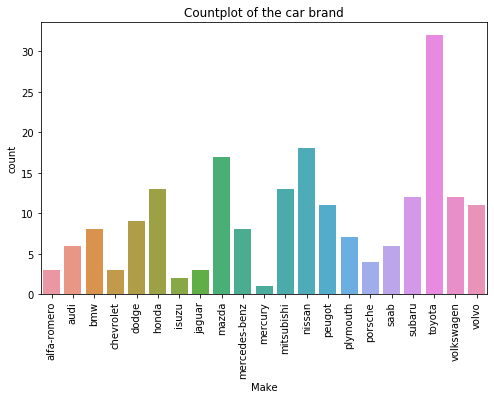

In [30]:
plt.figure(figsize=(8,5))
plt.title("Countplot of the car brand")  
sns.countplot(x='Make',data=auto)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

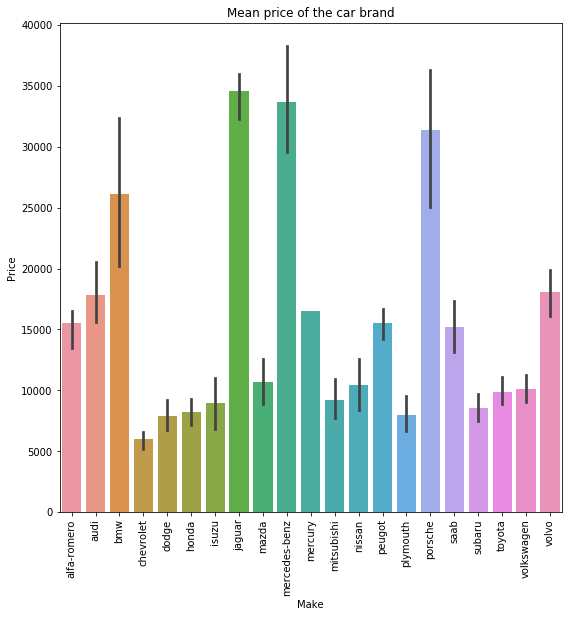

In [31]:
plt.figure(figsize=(9,9))
plt.title("Mean price of the car brand")  
sns.barplot(x = 'Make', y='Price', data = auto)
plt.xticks(rotation='vertical')

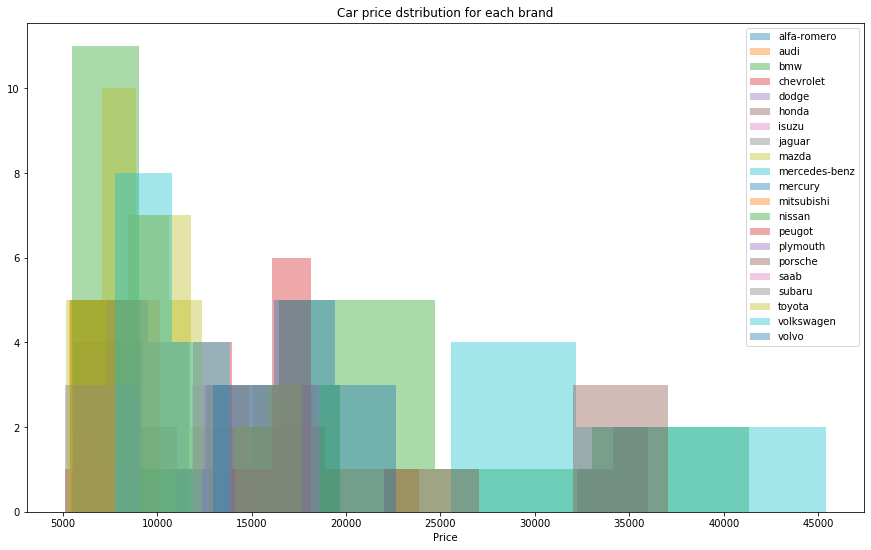

In [32]:
plt.figure(figsize=(15,9))
plt.title('Car price dstribution for each brand')
legend = []
for k in auto['Make'].unique():
    sns.distplot(auto[auto['Make']==k]['Price'],kde=False,label=k)
plt.legend()

## Question 1

Do you think there is a relation between the price column and the Make column? Make you reasoning

bmw, mercedes-benz, jaguar, porsche adalah merek mobil yang menaruh harga diatas 25000.
menurut saya tidak ada hubungannya, karena kelima perusahaan tersebut adalah produsen tipe mobil mewah/sport.

Create a new column called MPG-difference where the value is coming from the difference between Highway-MPG and City-MPG, then create another column called Car-Area from multipication of Length, Width, and Height columns.

In [33]:
mpgdiff = auto['Highway-MPG']-auto['City-MPG']
auto['MPG-Difference'] = mpgdiff

cararea = auto['Length']*auto['Width']*auto['Height']
auto['Car-Area'] = cararea

In [34]:
auto.head()

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price,MPG-Difference,Car-Area
0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495,6,528019.904
1,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500,6,528019.904
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500,7,587592.640
3,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950,6,634816.956
4,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450,4,636734.832


In [35]:
auto['MPG-Difference'].value_counts()

6    61
5    51
7    39
4    19
3     8
8     6
2     5
9     4
1     3
0     3
Name: MPG-Difference, dtype: int64

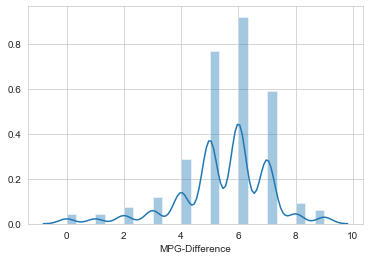

In [36]:
x = auto['MPG-Difference']
sns.set_style('whitegrid')
sns.distplot(x)

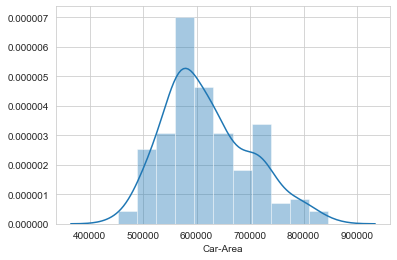

In [37]:
y = auto['Car-Area']
sns.set_style('whitegrid')
sns.distplot(y)

Now, use the IQR method to find the row outlier based on the MPG-Difference columns

In [38]:
Q1 = auto['MPG-Difference'].describe()['25%']
Q3 = auto['MPG-Difference'].describe()['75%']
IQR = Q3 - Q1

In [39]:
outlier=auto[~(auto['MPG-Difference'] >= Q1 - (1.5*IQR)) & (auto['MPG-Difference'] <= Q3 + (1.5 * IQR))]
outlier

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price,MPG-Difference,Car-Area
8,audi,gas,turbo,4.0,sedan,fwd,front,105.8,192.7,71.4,...,3.13,3.40,8.3,140.0,5500.0,17,20,23875,3,769115.802
47,mazda,gas,std,2.0,hatchback,fwd,front,93.1,159.1,64.2,...,3.03,3.15,9.0,68.0,5000.0,30,31,5195,1,552589.302
64,mercedes-benz,diesel,turbo,4.0,sedan,rwd,front,110.0,190.9,70.3,...,3.58,3.64,21.5,123.0,4350.0,22,25,25552,3,758245.255
65,mercedes-benz,diesel,turbo,4.0,wagon,rwd,front,110.0,190.9,70.3,...,3.58,3.64,21.5,123.0,4350.0,22,25,28248,3,787769.849
66,mercedes-benz,diesel,turbo,2.0,hardtop,rwd,front,106.7,187.5,70.3,...,3.58,3.64,21.5,123.0,4350.0,22,25,28176,3,723650.625
67,mercedes-benz,diesel,turbo,4.0,sedan,rwd,front,115.6,202.6,71.7,...,3.58,3.64,21.5,123.0,4350.0,22,25,31600,3,817837.446
68,mercedes-benz,gas,std,4.0,sedan,rwd,front,115.6,202.6,71.7,...,3.46,3.10,8.3,155.0,4750.0,16,18,34184,2,820742.730
69,mercedes-benz,gas,std,2.0,convertible,rwd,front,96.6,180.3,70.5,...,3.46,3.10,8.3,155.0,4750.0,16,18,35056,2,645726.420
70,mercedes-benz,gas,std,4.0,sedan,rwd,front,120.9,208.1,71.7,...,3.80,3.35,8.0,184.0,4500.0,14,16,40960,2,846007.659
71,mercedes-benz,gas,std,2.0,hardtop,rwd,front,112.0,199.2,72.0,...,3.80,3.35,8.0,184.0,4500.0,14,16,45400,2,794568.960


In [40]:
outlier.describe()

,Num-of-Doors,Wheel-Base,Length,Width,Height,Curb-Weight,Cylinders,Engine-Size,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price,MPG-Difference,Car-Area
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,3.368421,105.515789,185.547368,68.394737,55.315789,3107.000000,5.210526,163.947368,3.456316,3.294211,14.810526,116.842105,4805.263158,22.842105,24.789474,21579.473684,1.947368,706002.953053
std,0.955134,8.871381,14.618077,3.019285,2.159800,659.117845,1.583910,66.442518,0.249471,0.303595,6.821119,35.743318,708.263670,5.550407,5.503322,12233.063863,1.129094,102416.176902
min,2.000000,93.100000,159.100000,64.000000,50.800000,1890.000000,4.000000,91.000000,3.010000,2.640000,7.700000,56.000000,4150.000000,14.000000,16.000000,5195.000000,0.000000,552589.302000
25%,2.000000,96.750000,172.800000,65.400000,54.200000,2432.500000,4.000000,109.000000,3.255000,3.100000,8.300000,95.000000,4350.000000,19.500000,21.500000,10118.000000,1.000000,617056.848000
50%,4.000000,106.700000,188.800000,68.900000,55.400000,3430.000000,5.000000,152.000000,3.580000,3.350000,9.400000,112.000000,4500.000000,23.000000,25.000000,22470.000000,2.000000,723650.625000
75%,4.000000,113.100000,198.900000,70.950000,56.500000,3700.000000,5.500000,183.000000,3.620000,3.520000,21.500000,131.500000,4800.000000,26.000000,28.000000,29924.000000,3.000000,796584.186000
max,4.000000,120.900000,208.100000,72.000000,58.700000,3900.000000,8.000000,308.000000,3.800000,3.640000,23.000000,184.000000,6600.000000,34.000000,36.000000,45400.000000,3.000000,846007.659000


In [41]:
non_outlier=auto[(auto['MPG-Difference'] >= Q1 - (1.5*IQR)) & (auto['MPG-Difference'] <= Q3 + (1.5 * IQR))]
non_outlier

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price,MPG-Difference,Car-Area
0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495,6,528019.904
1,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500,6,528019.904
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500,7,587592.640
3,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950,6,634816.956
4,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450,4,636734.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,volvo,gas,turbo,4.0,wagon,rwd,front,104.3,188.8,67.2,...,3.62,3.15,7.5,162.0,5100.0,17,22,18950,5,729523.200
196,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845,5,721961.760
197,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045,6,720913.920
198,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485,5,721961.760


Text(0.5, 1.0, 'Car-Area distribution of the outlier')

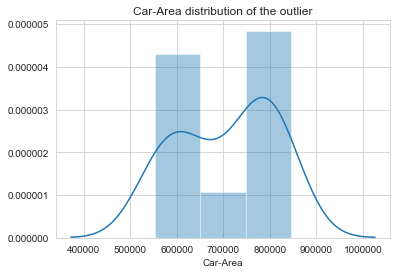

In [42]:
z = outlier['Car-Area']
sns.set_style('whitegrid')
sns.distplot(z)
plt.title("Car-Area distribution of the outlier")

Text(0.5, 1.0, 'Price distribution of the outlier')

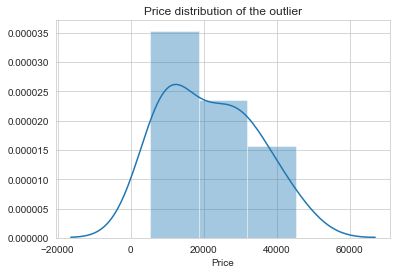

In [43]:
sns.set_style('whitegrid')
sns.distplot(outlier['Price'])
plt.title("Price distribution of the outlier")

## Question 2

From the describe, and few plots that I see it seems in our outlier based on the MPG-Differences that the car is quite big. Do you agree with my assumption? give me your reasoning

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

What do you think the feature that really affecting the price? give me your explanation with the data


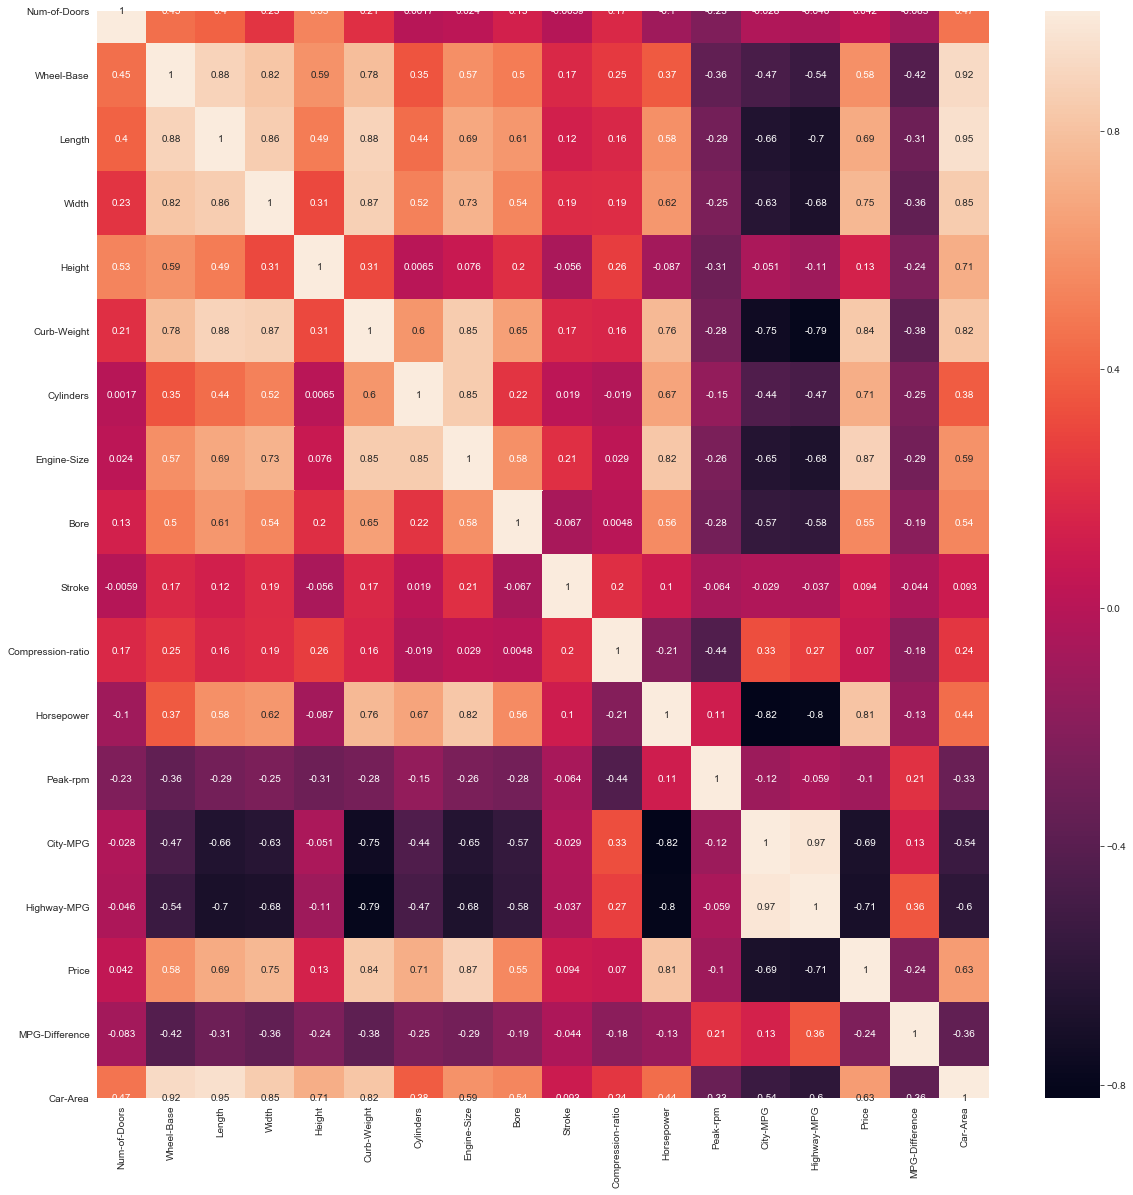

In [44]:
plt.figure(figsize = (20,20))
sns.heatmap(auto.corr(), annot = True)


jika dilihat dari heatmap corr diatas, price mempunyai positive correlation yang kuat dengan beberapa kolom, seperti (disusun dari yang paling tinggi ke rendah) :

1. Engine-Size =is the volume of fuel and air that can be pushed through a car's cylinders
2. Curb-Weight = total weight of a vehicle including all factory-installed equipment but without occupants or baggage.
3. Horsepower = a unit of measurement of power
4. Width
5. Cylinders = the power unit of an engine; it's the chamber where the gasoline is burned and turned into power. Generally, an                engine with more cylinders produces more power
6. Length
7. Car-Area
8. Wheel-Base
9. Bore



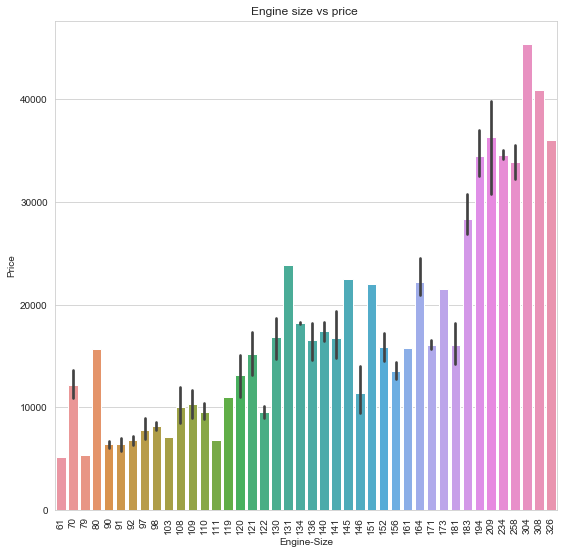

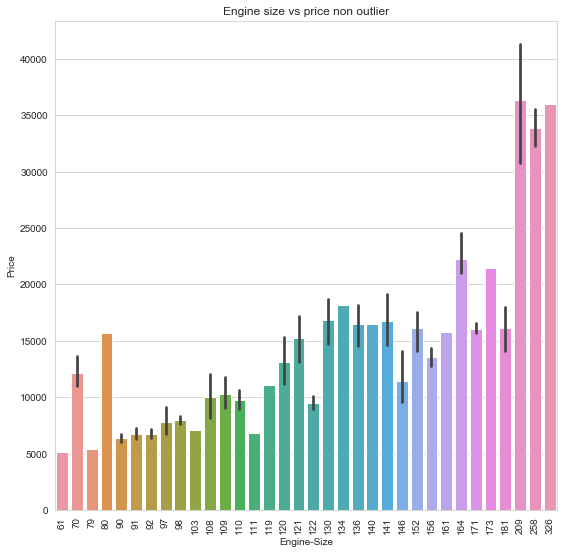

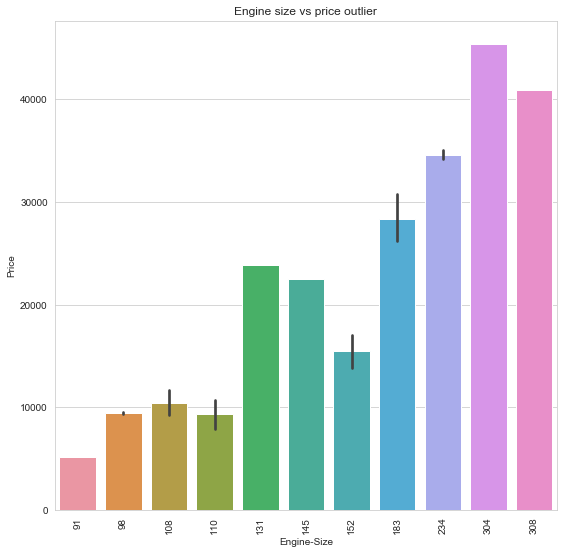

In [45]:
# ENGINE SIZE
# data asli
plt.figure(figsize=(9,9))
plt.title("Engine size vs price ")  
sns.barplot(x = 'Engine-Size', y='Price', data = auto)
plt.xticks(rotation='vertical')
plt.show()
# non outlier
plt.figure(figsize=(9,9))
plt.title("Engine size vs price non outlier")  
sns.barplot(x = 'Engine-Size', y='Price', data = non_outlier)
plt.xticks(rotation='vertical')
plt.show()
# outlier
plt.figure(figsize=(9,9))
plt.title("Engine size vs price outlier")  
sns.barplot(x = 'Engine-Size', y='Price', data = outlier)
plt.xticks(rotation='vertical')
plt.show()

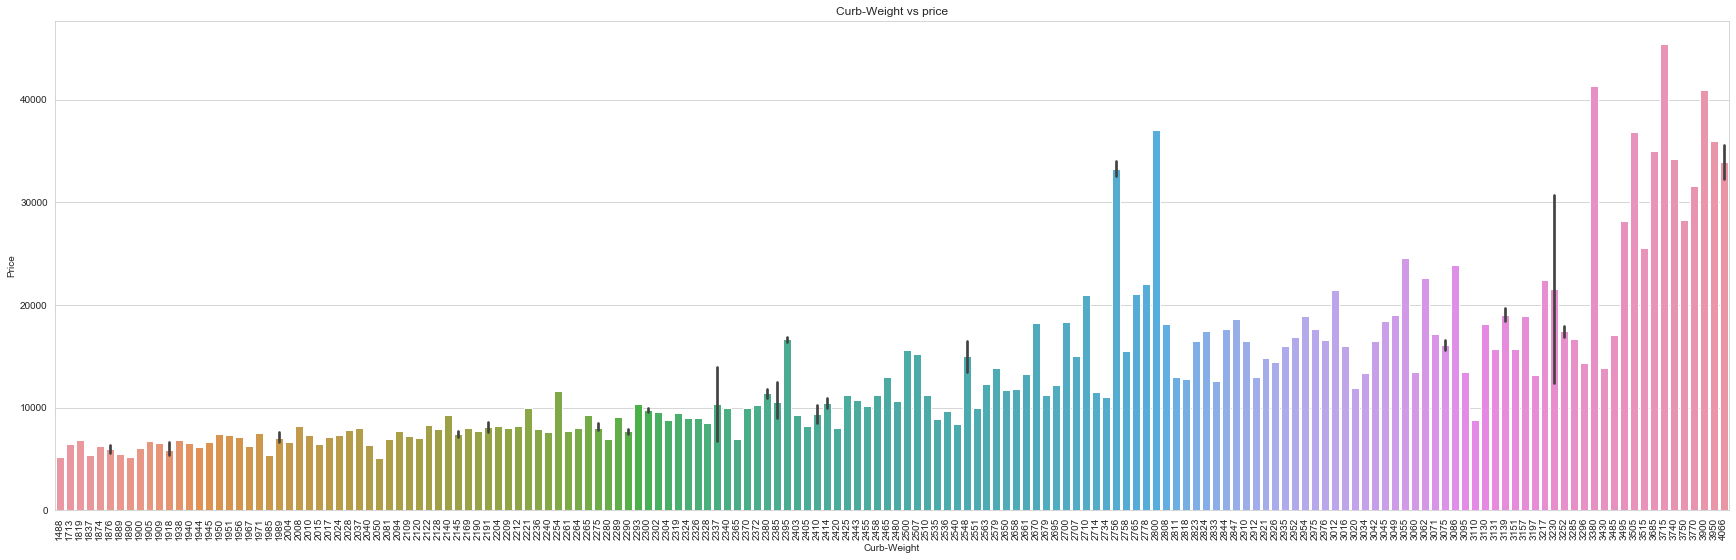

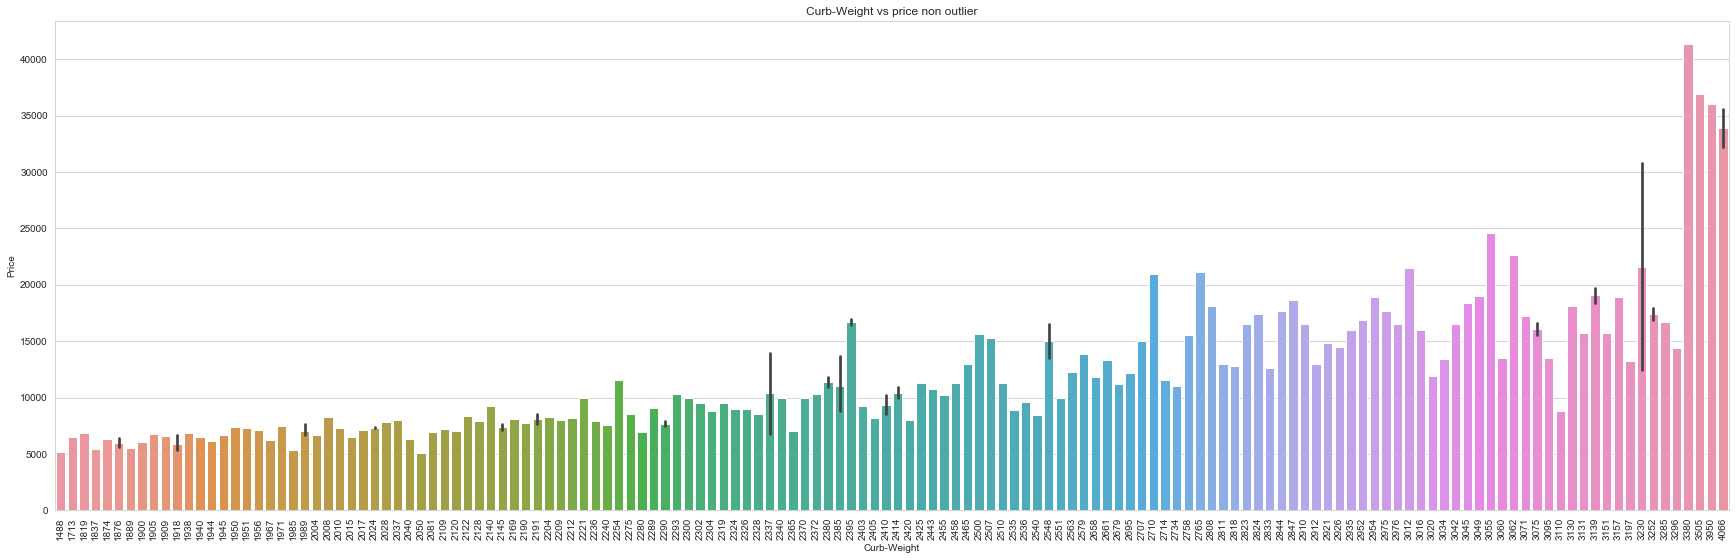

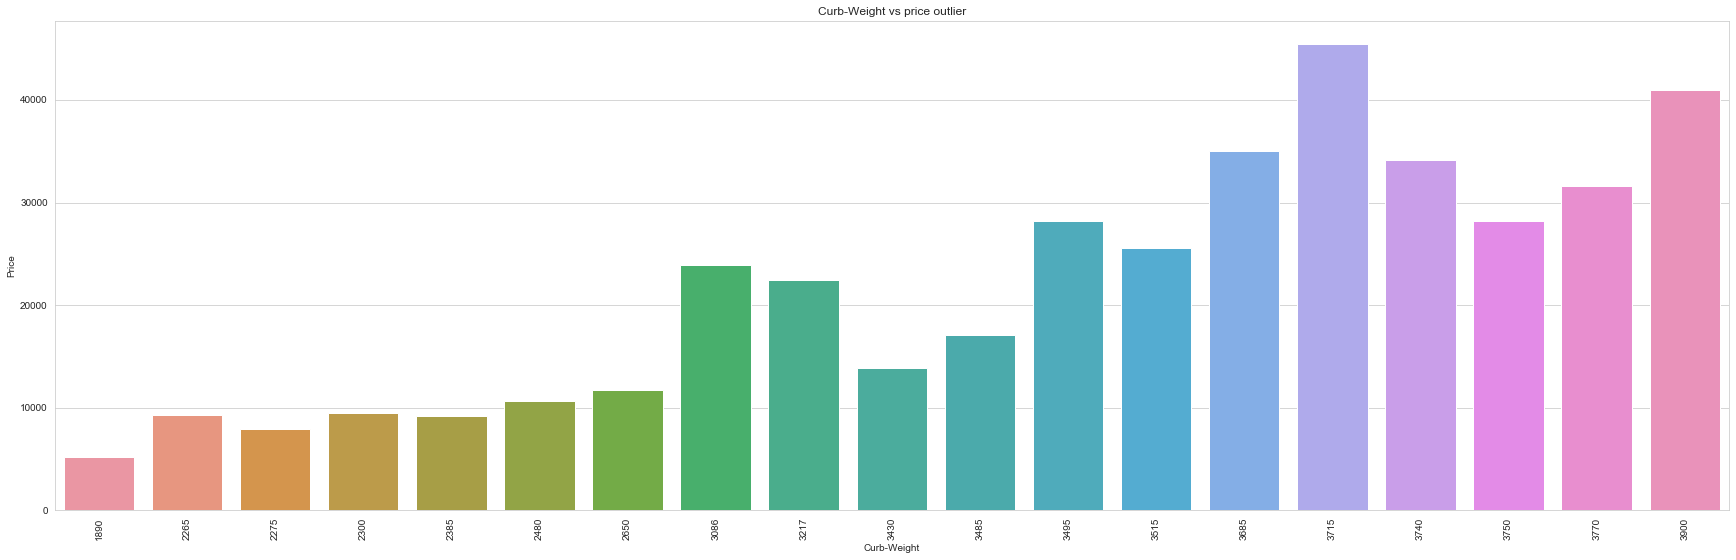

In [46]:
# CURB WEIGHT
# data awal
plt.figure(figsize=(30,9))
plt.title("Curb-Weight vs price")  
sns.barplot(x = 'Curb-Weight', y='Price', data = auto)
plt.xticks(rotation='vertical')
plt.show()
# non outlier
plt.figure(figsize=(30,9))
plt.title("Curb-Weight vs price non outlier")  
sns.barplot(x = 'Curb-Weight', y='Price', data = non_outlier)
plt.xticks(rotation='vertical')
plt.show()
# outlier
plt.figure(figsize=(30,9))
plt.title("Curb-Weight vs price outlier")  
sns.barplot(x = 'Curb-Weight', y='Price', data = outlier)
plt.xticks(rotation='vertical')
plt.show()



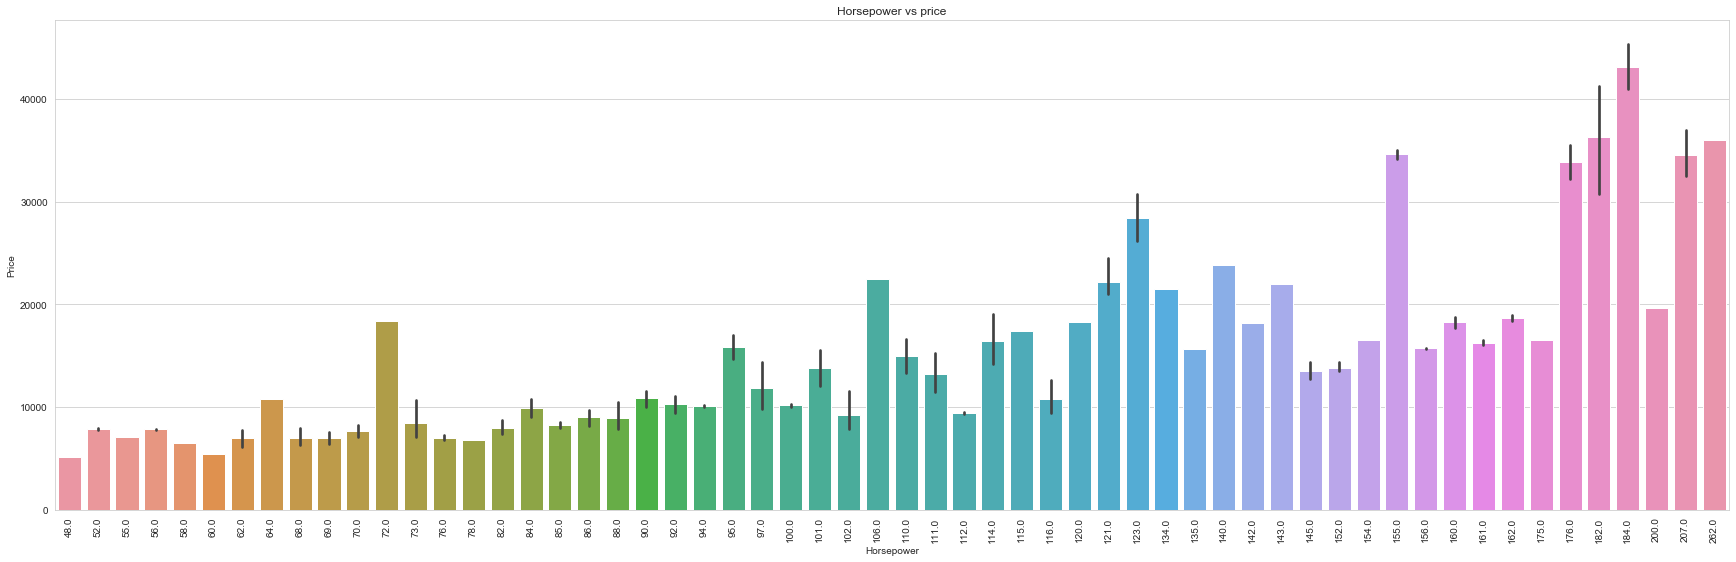

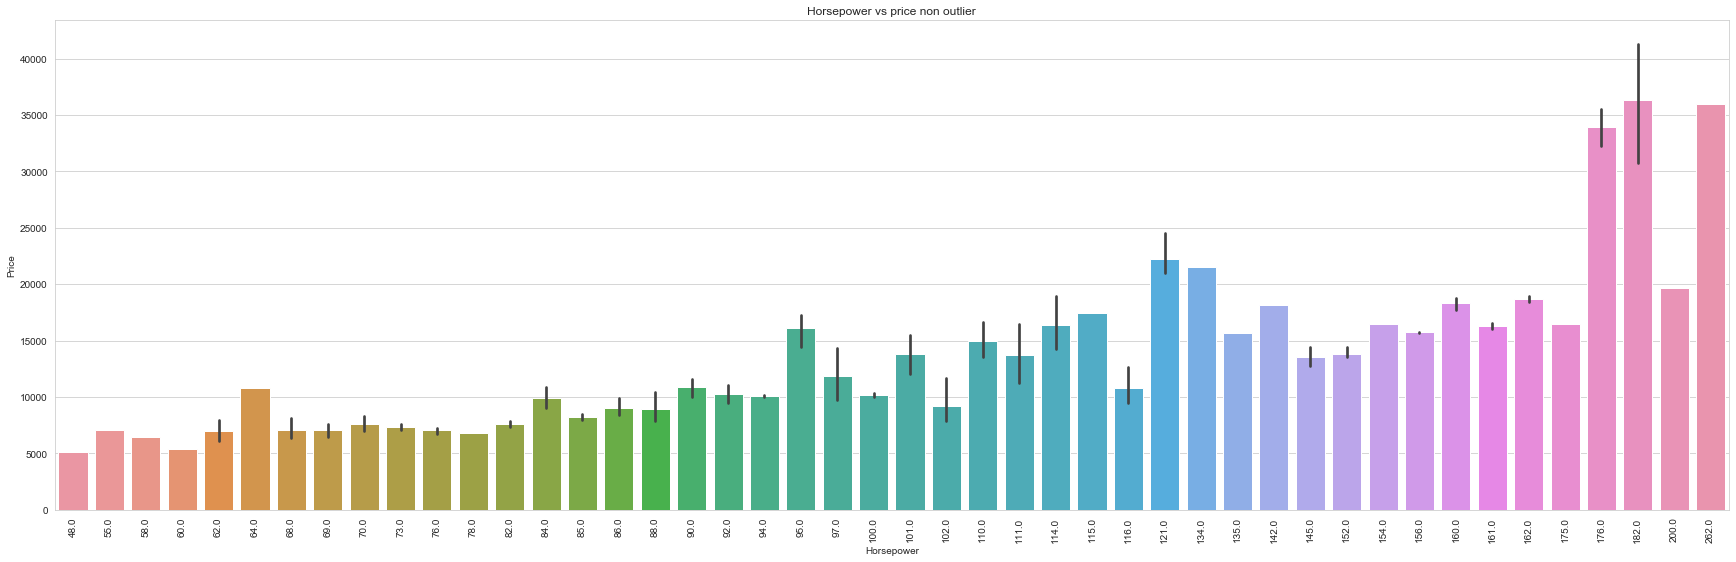

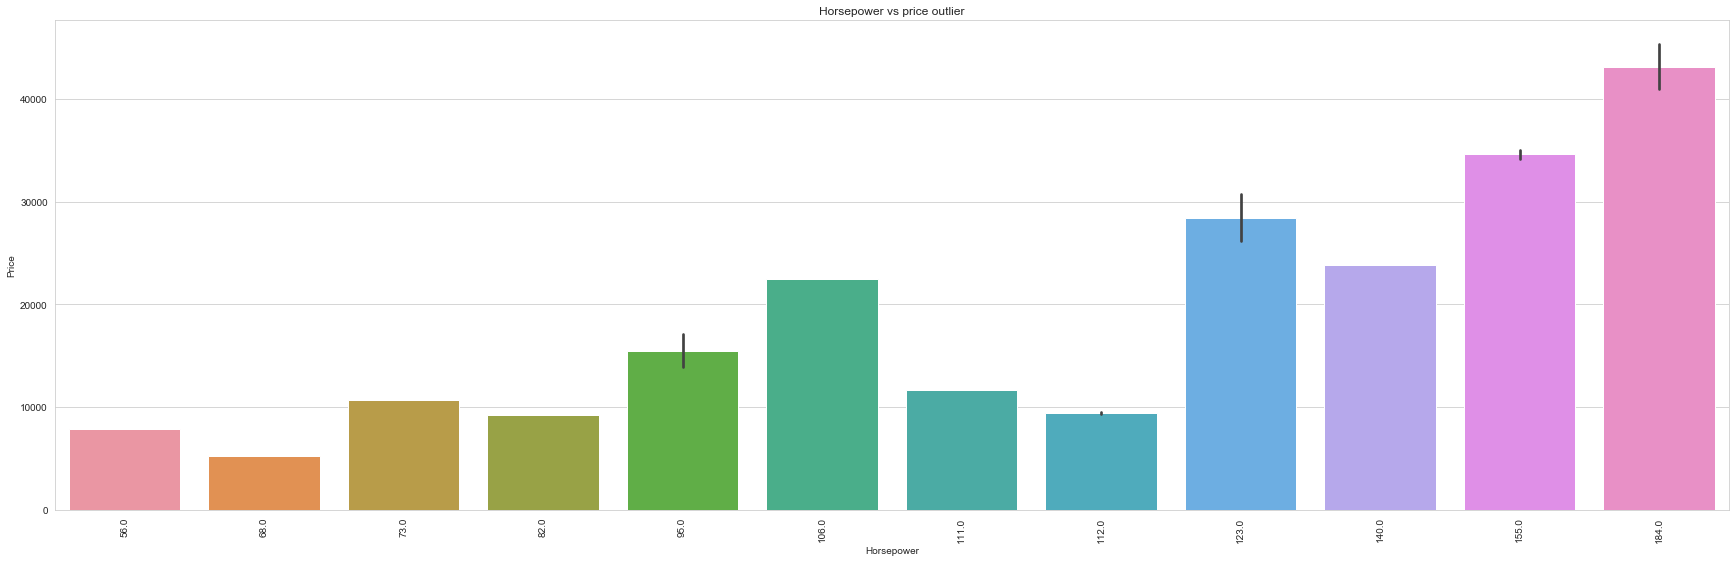

In [47]:
# HORSEPOWER
# data awal
plt.figure(figsize=(30,9))
plt.title("Horsepower vs price")  
sns.barplot(x = 'Horsepower', y='Price', data = auto)
plt.xticks(rotation='vertical')
plt.show()
# non outlier
plt.figure(figsize=(30,9))
plt.title("Horsepower vs price non outlier")  
sns.barplot(x = 'Horsepower', y='Price', data = non_outlier)
plt.xticks(rotation='vertical')
plt.show()
# outlier
plt.figure(figsize=(30,9))
plt.title("Horsepower vs price outlier")  
sns.barplot(x = 'Horsepower', y='Price', data = outlier)
plt.xticks(rotation='vertical')
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

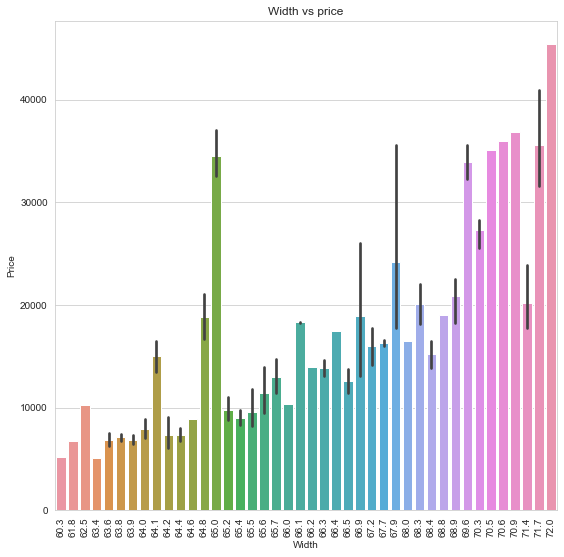

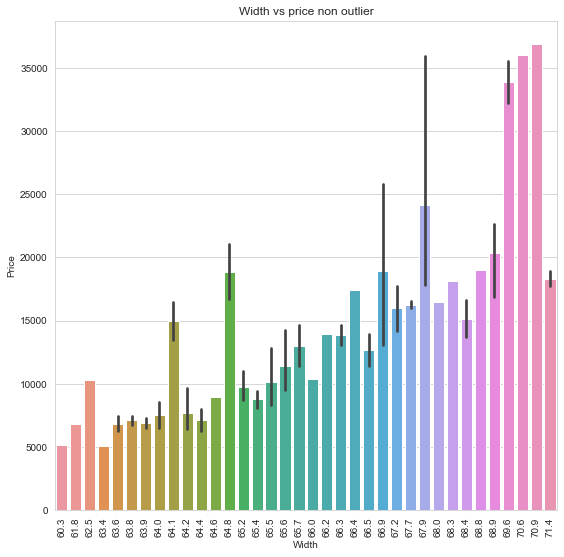

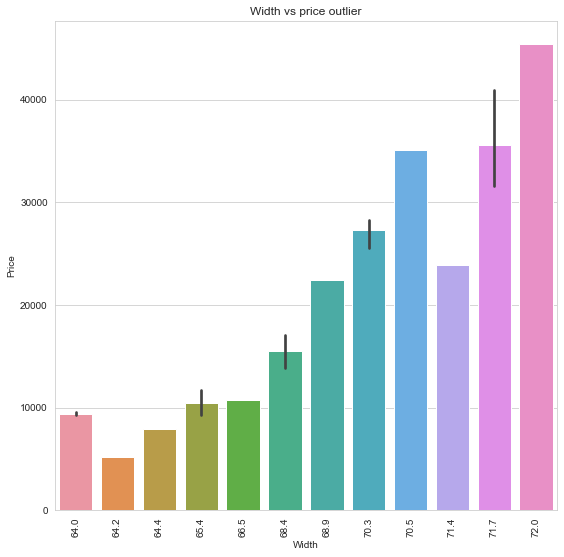

In [48]:
# WIDTH
# data awal
plt.figure(figsize=(9,9))
plt.title("Width vs price")  
sns.barplot(x = 'Width', y='Price', data = auto)
plt.xticks(rotation='vertical')
plt.show
# non_outlier
plt.figure(figsize=(9,9))
plt.title("Width vs price non outlier")  
sns.barplot(x = 'Width', y='Price', data = non_outlier)
plt.xticks(rotation='vertical')
plt.show
# outlier
plt.figure(figsize=(9,9))
plt.title("Width vs price outlier")  
sns.barplot(x = 'Width', y='Price', data = outlier)
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

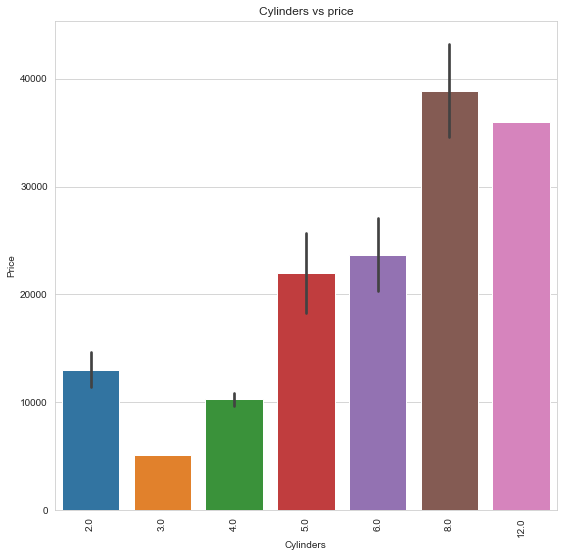

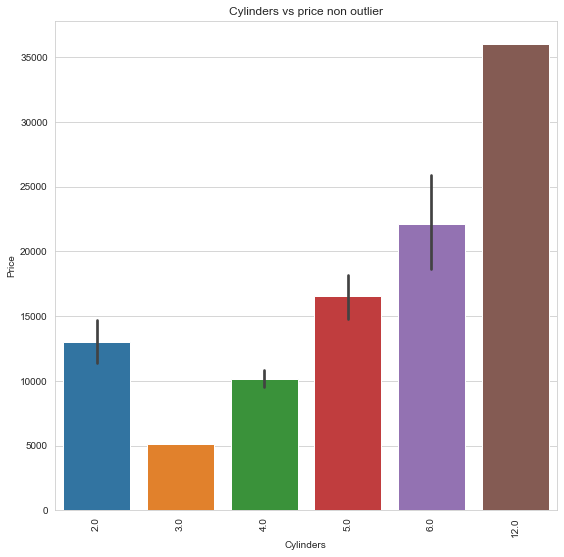

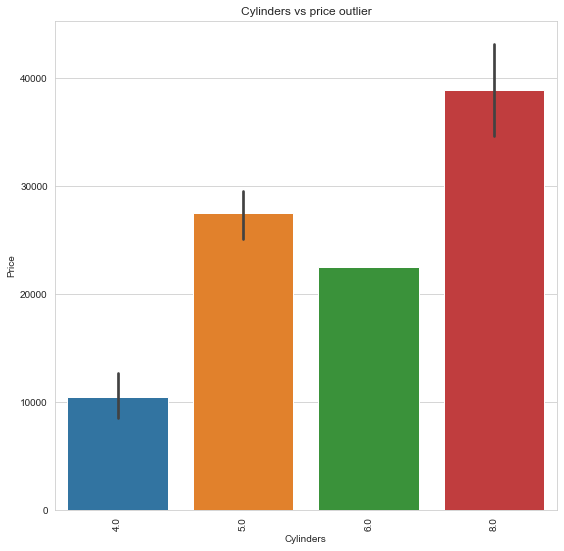

In [49]:
# Cylinders
# data awal
plt.figure(figsize=(9,9))
plt.title("Cylinders vs price")  
sns.barplot(x = 'Cylinders', y='Price', data = auto)
plt.xticks(rotation='vertical')
plt.show
# non_outlier
plt.figure(figsize=(9,9))
plt.title("Cylinders vs price non outlier")  
sns.barplot(x = 'Cylinders', y='Price', data = non_outlier)
plt.xticks(rotation='vertical')
plt.show
# outlier
plt.figure(figsize=(9,9))
plt.title("Cylinders vs price outlier")  
sns.barplot(x = 'Cylinders', y='Price', data = outlier)
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

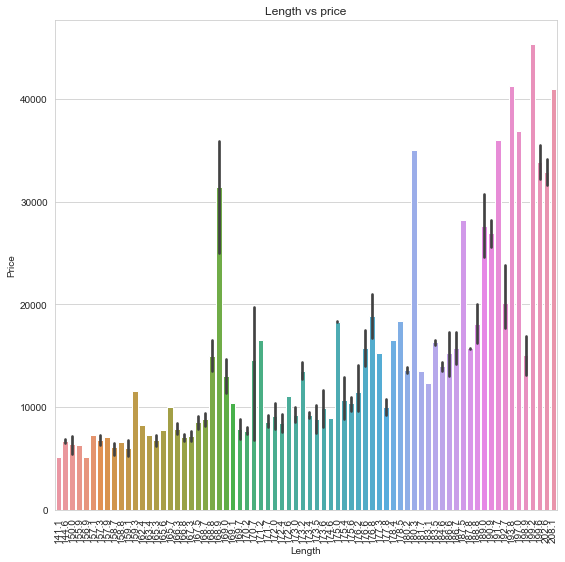

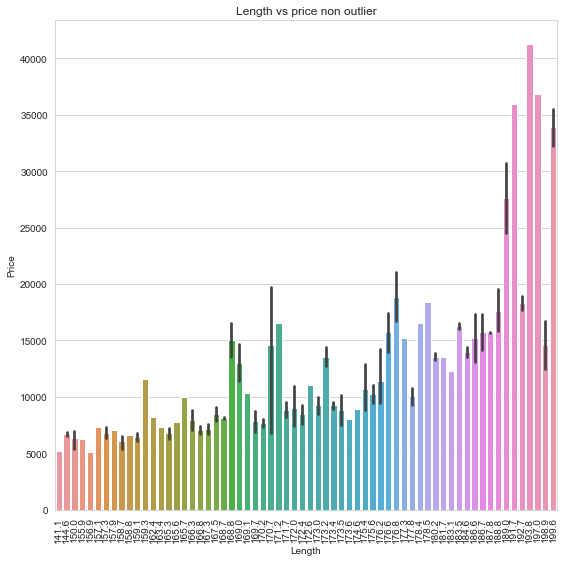

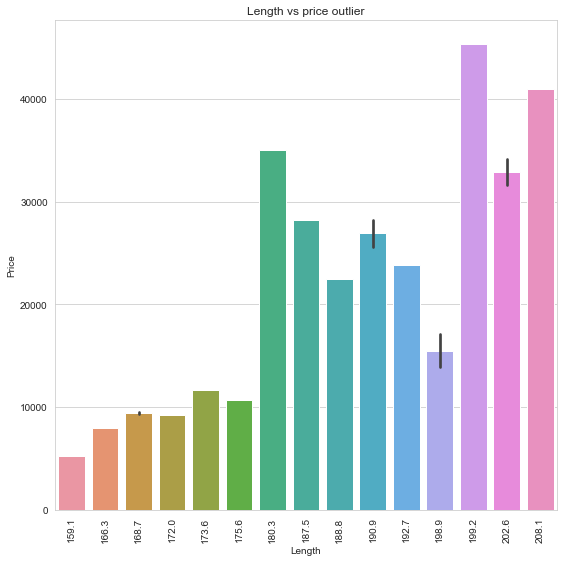

In [50]:
# Length
# data awal
plt.figure(figsize=(9,9))
plt.title("Length vs price")  
sns.barplot(x = 'Length', y='Price', data = auto)
plt.xticks(rotation='vertical')
plt.show
# non_outlier
plt.figure(figsize=(9,9))
plt.title("Length vs price non outlier")  
sns.barplot(x = 'Length', y='Price', data = non_outlier)
plt.xticks(rotation='vertical')
plt.show
# outlier
plt.figure(figsize=(9,9))
plt.title("Length vs price outlier")  
sns.barplot(x = 'Length', y='Price', data = outlier)
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

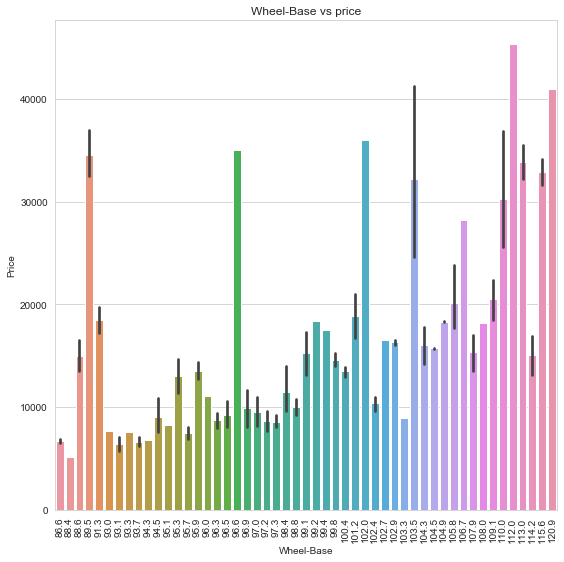

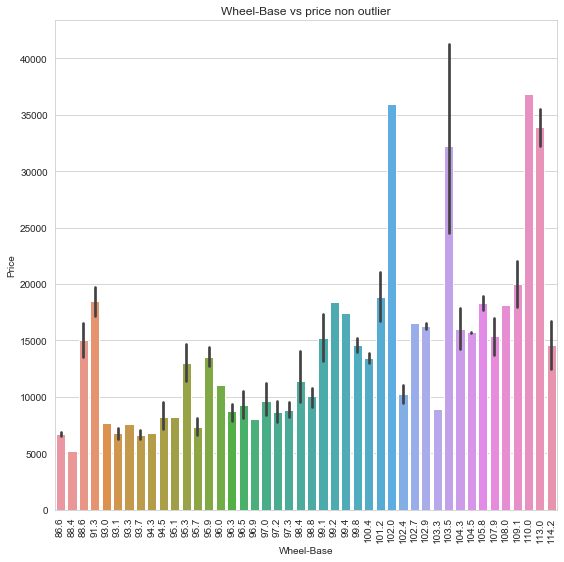

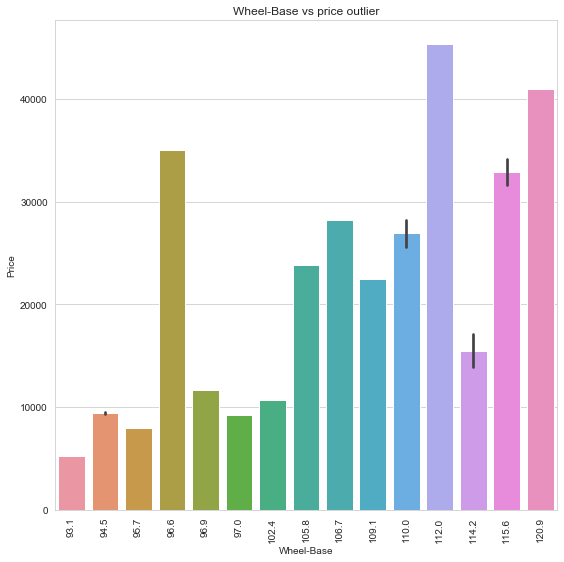

In [51]:
# Wheel-Base
# data awal
plt.figure(figsize=(9,9))
plt.title("Wheel-Base vs price")  
sns.barplot(x = 'Wheel-Base', y='Price', data = auto)
plt.xticks(rotation='vertical')
plt.show
# non_outlier
plt.figure(figsize=(9,9))
plt.title("Wheel-Base vs price non outlier")  
sns.barplot(x = 'Wheel-Base', y='Price', data = non_outlier)
plt.xticks(rotation='vertical')
plt.show
# outlier
plt.figure(figsize=(9,9))
plt.title("Wheel-Base vs price outlier")  
sns.barplot(x = 'Wheel-Base', y='Price', data = outlier)
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

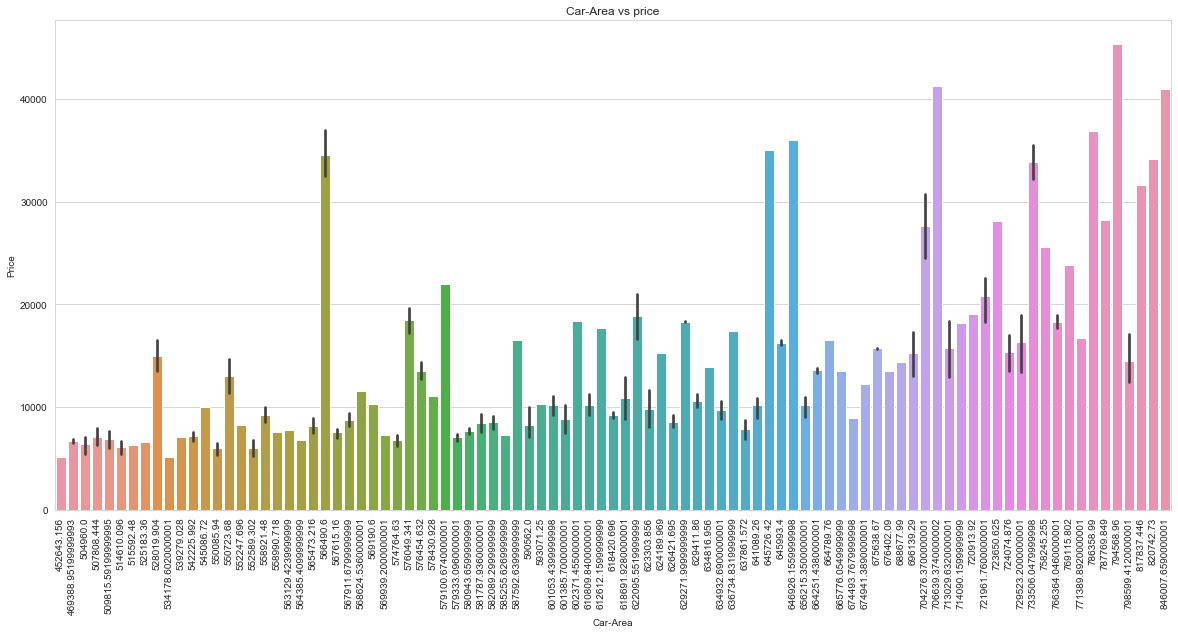

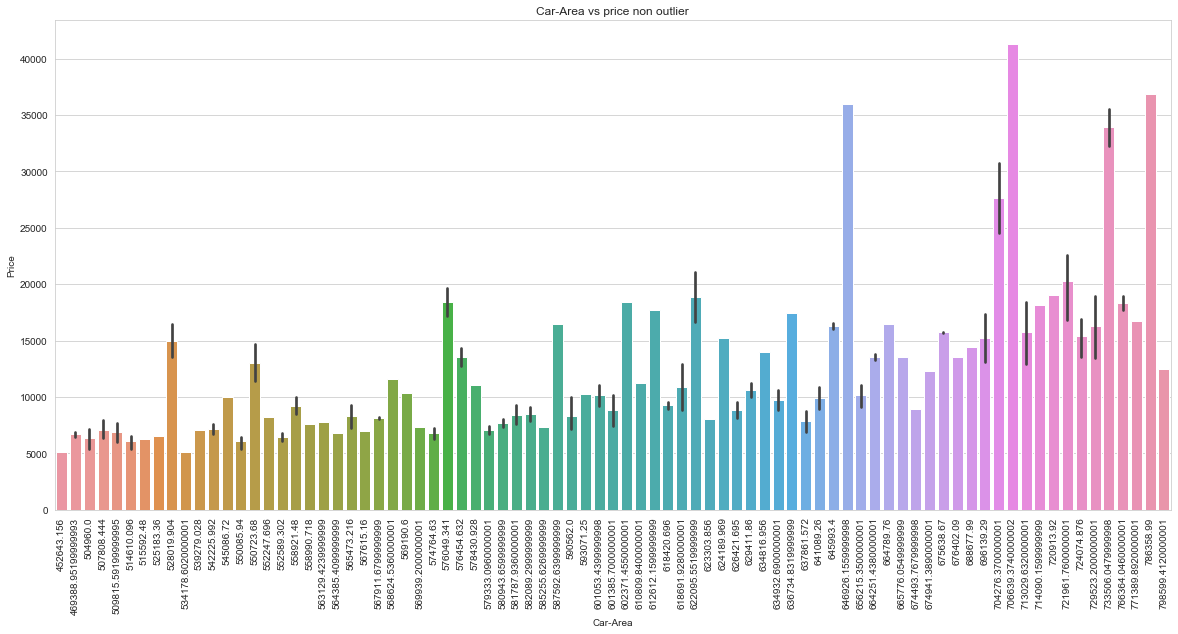

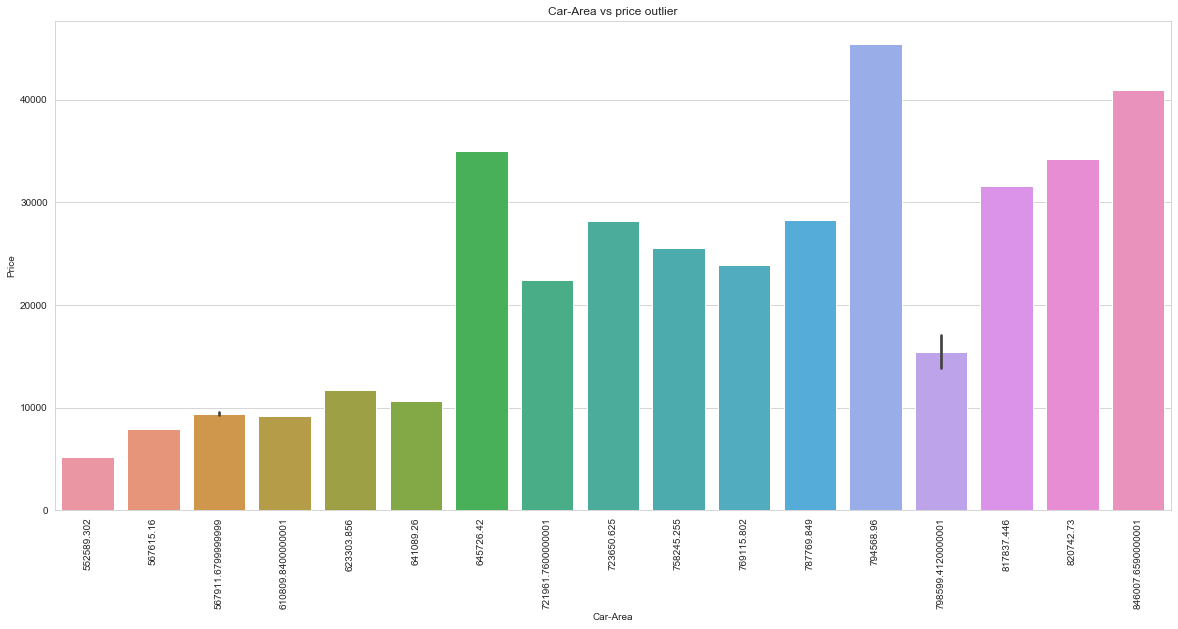

In [52]:
# Car-Area
# data awal
plt.figure(figsize=(20,9))
plt.title("Car-Area vs price")  
sns.barplot(x = 'Car-Area', y='Price', data = auto)
plt.xticks(rotation='vertical')
plt.show
# non_outlier
plt.figure(figsize=(20,9))
plt.title("Car-Area vs price non outlier")  
sns.barplot(x = 'Car-Area', y='Price', data = non_outlier)
plt.xticks(rotation='vertical')
plt.show
# outlier
plt.figure(figsize=(20,9))
plt.title("Car-Area vs price outlier")  
sns.barplot(x = 'Car-Area', y='Price', data = outlier)
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

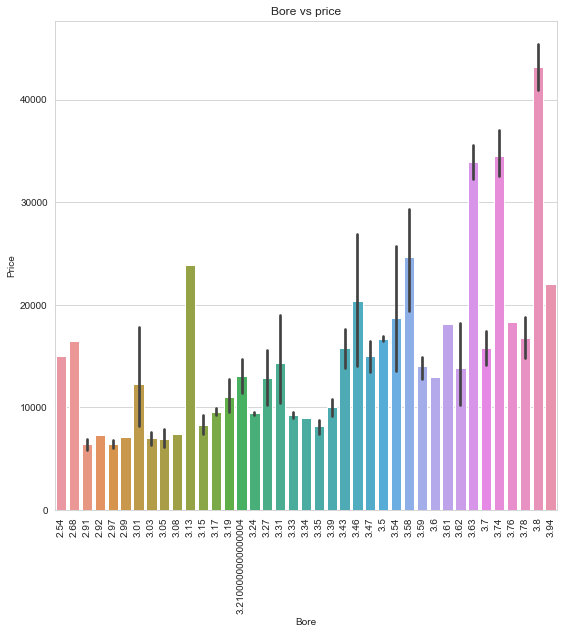

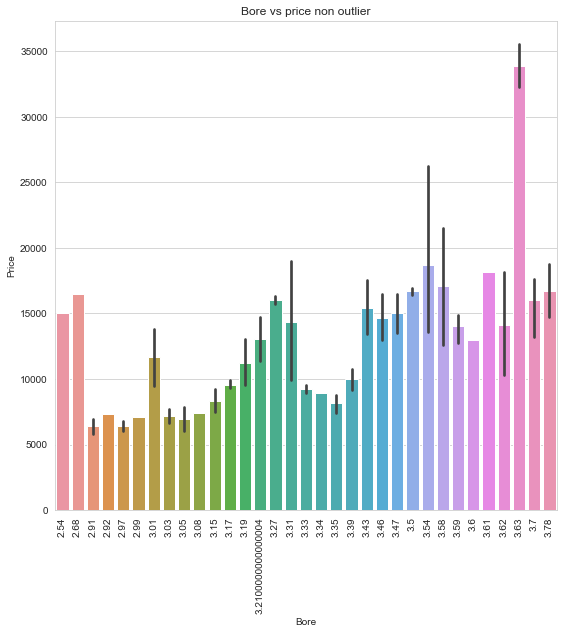

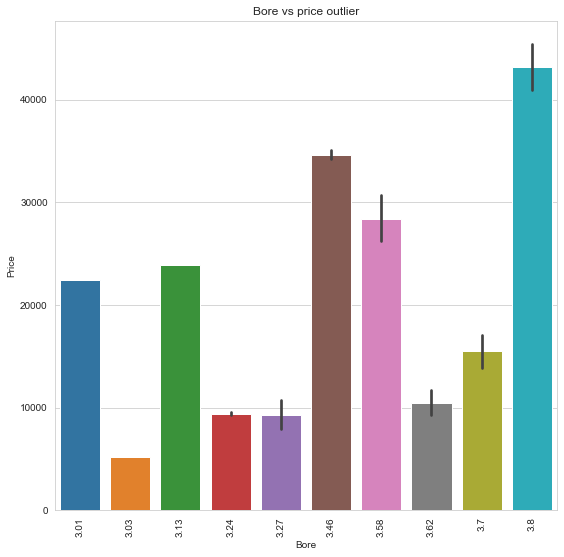

In [53]:
# Bore
# data awal
plt.figure(figsize=(9,9))
plt.title("Bore vs price")  
sns.barplot(x = 'Bore', y='Price', data = auto)
plt.xticks(rotation='vertical')
plt.show
# non_outlier
plt.figure(figsize=(9,9))
plt.title("Bore vs price non outlier")  
sns.barplot(x = 'Bore', y='Price', data = non_outlier)
plt.xticks(rotation='vertical')
plt.show
# outlier
plt.figure(figsize=(9,9))
plt.title("Bore vs price outlier")  
sns.barplot(x = 'Bore', y='Price', data = outlier)
plt.xticks(rotation='vertical')
plt.show

dilihat dari 3 teratas yang mempunyai positive correlation paling besar dengan price. untuk engine-size, curb-weight- horsepower jika dilihat secara rata-rata, semakin besar ukuran mesin, berat mobil dan horsepower dari mobil, maka semakin mahal harga mobil tersebut.

1. Engine-Size =is the volume of fuel and air that can be pushed through a car's cylinders
>semakin besar volume engine size, maka semakin banyak pula bahan bakar udara yang dapat dibakar. maka semakin mahal harganya
   
2. Curb-Weight = total weight of a vehicle including all factory-installed equipment but without occupants or baggage.
>semakin berat mobil tersebut, semakin mahal pula harganya
3. Horsepower = a unit of measurement of power.
>semakin besar horsepower maka akan semakin tinggi laju kendaraan tersebut, maka akan memengaruhi harga secara positif. semakin besar horsepower, makin mahal harganya

4. Width
>makin lebar mobil, makin mahal harganya
5. Cylinders = the power unit of an engine; it's the chamber where the gasoline is burned and turned into power. Generally, an engine with more cylinders produces more power
>semakin banyak silinder nya, akan menghasilkan lebih banyak power. sehingga makin mahaln harganya
6. Length
>makin panjang ukuran mobil, makin mahal harganya
7. Car-Area
>car area ini adalah volume mobil tersebut. semakin besar volumenya , maka harga semakin mahal
8. Wheel-Base = jarak antara pusat ban depan & belakang
>semakin jauh jaraknya, makin mahal harganya
9. Bore = s the diameter of each cylinder.
>semakin besar diameternya, makin mahal harganya

In [56]:
auto

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price,MPG-Difference,Car-Area
0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495,6,528019.904
1,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500,6,528019.904
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500,7,587592.640
3,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950,6,634816.956
4,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450,4,636734.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845,5,721961.760
197,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045,6,720913.920
198,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485,5,721961.760
199,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470,1,721961.760


To create our dashboard, convert your cleaned data as CSV (Just name it as auto_imports_ujian.csv, and don't forget to not including the index) and then export it to your SQL database

In [54]:
auto.to_csv('auto_imports_ujian.csv',index=False)